# 1. 인트로

## 1) RNN의 한계

### (1) 장기 의존성 문제
- 시퀀스가 길어질수록, 데이터 후반부에서 초반에 위치한 정보가 잘 반영되지 않던 문제

### (2) Vanishing Gradient
- 역전파 과정에서 곱해지는 가중치가 0보다 작을 때, 후반부 데이터들에 초반부의 데이터의 정보가 반영되지 않는 문제

## 2) LSTM의 한계

### (1) 장시간 학습
- 3가지 게이트를 운용하므로, 계산이 복잡하고 시간이 오래 걸림

### (2) Vanishing Gradient
- 해당 문제를 해결하기 위해 발전된 형태의 모델이지만, 여전히 긴 문장에 있어서는 Vanishing Gradient 문제가 발생함

## 3) Attention의 등장

- 중요한 것에 집중하는 매커니즘
- 결과를 만들 때, 지금 이 순간 가장 중요한 부분에 더 높은 가중치를 부여 (모든 입력값을 동일하게 X)
- 출력 단어를 만들 때, 입력 문장에서 어떤 단어에 얼마나 집중할지를 고르는 기술

### (1) Seq2Seq 방식과 비교했을 때의 가장 중요한 차이점:
- 출력 시점마다 새로운 context vector를 동적으로 계산
    -> **병렬화**

### (2) Attention의 장점
1. 시간 경과에 대한 유연성 (vs RNN)
    - 장기 의존성 문제 해결
    - 모든 단어에서 다른 모든 단어로 직접적인 연결고리를 만들어, 멀리 떨어진 단어 사이의 관계도 정보 손실 없이 명확하게 파악
2. 공간에 대한 유연성 (vs CNN)
    - 이미지의 모든 픽셀이 다른 모든 픽셀과 직접 연결
    - 픽셀 간의 거리에 상관없이 한 번에 전체 이미지의 전역적인 관계 학습 가능\
    => 이미지 내 복잡한 상호작용을 유연하게 포착
3. 병렬화 (vs RNN)
    - self-attention에서 각 단어간 관계 계산 과정에서 다른 단어의 계산이 끝날 때까지 기다릴 필요 없이, 문장 내 모든 단어의 관계를 한 번에 병렬 계산 가능

## Attention is All You Need(2017)
=> Attention을 쓰던 딥러닝 모델들의 대부분이 Self-Attention 방식 채택
- GPT, Geminim Claude, DeepSeek, LLaMa, EXAONE 등

- 오직 Attention만을 사용하는 모델: Self-Attention에 기반한 Transformer 모델 제안
- 성공적인 모델링에서 Recurrence 및 Convolution이 필수가 아님 증명
- 여러가지 파급효과
    1. LLM 탄생: BERT, GPT 두 거대 모델의 직접적 기반
    2. NLP 평정: 번역, 요약, 챗봇 등 거의 모든 자연어 처리 분야에서 트랜스포머 기반 모델들이 표준으로 자리잡음
    3. 타 분야 확장: 컴퓨터 비전, 음성 처리, 신약 개발 등

### Transformer ?
- 오직 attention만으로 문장의 의미와 구조를 파악하는 모델
    - 기존엔 RNN 기반 인코더와 디코더 사이를 Attention으로 연결
    - transformer에서는 인코더, 디코더마저 Attention 메커니즘으로 해결
- 핵심 기술
    1. Self-Attention
        - 문장 안에서 어떤 단어가 다른 단어들과 얼마나 중요한 관계를 맺고 있는지 한 번에 파악하는 기술
    2. Multi-Head Attention
        - Self-Attention을 여러 개의 머리로 동시에, 서로 다른 관점에서 실행
    3. Positional Encoding
        - 단어의 위치 정보를 벡터에 추가해 각 단어가 문장의 몇 번째 위치에 존재하는지 알 수 있게 표시

# 2. Self-Attention

## Query, Key, Value

### (1) Q: Query
- '질문' 또는 '요청'
- 지금 당장 내가 알고 싶거나, 초점을 맞추고 있는 대상

### (2) K: Key
- 검색 대상이 되는 모든 정보들이 달고 있는 '이름표' 또는 '색인'
- 쿼리는 이 키와 자신을 비교해 얼마나 관련이 있는지 확인
### (3) V: Value
- 키와 한 쌍으로 묶여 있는 '실제 내용물'
- 쿼리와 키으 관련도 계산을 통해 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 밸류를 가져와 사용

## 기존 Cross-Attention vs Self-Attention

|      구분     |                       기존 어텐션 (Cross-Attention)                      |         셀프 어텐션 (Self-Attention)        |
|:-------------:|:------------------------------------------------------------------------:|:-------------------------------------------:|
| 핵심 아이디어 | 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성                                | 문장 자체를 뜯어보며 내부 관계를 파악       |
| 작동 방식     | 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 메커니즘 | 한 문장 내 모든 단어끼리 서로의 관계를 계산 |
| 참조 대상     | 서로 다른 시퀀스 (인코더 ↔ 디코더)                                       | 동일한 시퀀스 (문장 내부 ↔ 문장 내부)       |
| 주요 목적     | 인코더-디코더 연결, 정보 병목 현상 해소                                  | 시퀀스 내부의 문맥 및 의존 관계 파악        |
| 기반 아키텍처 | RNN (LSTM, GRU)                                                          | 트랜스포머 (Attention Only)                 |
| 병렬 처리     | 불가능 (순차적)                                                          | 가능                                        |

### (1) Self-Attention의 핵심 과정
1. 단어의 프로필 만들기 (벡터 임베딩)
    - 각 단어를 고유 특징을 담은 벡터로 변환
2. 단어 간 관계 점수 계산 (내정 및 정렬 점수)
    - 모든 단어 벡터끼리의 '관계 점수'를 계산 (관계가 깊을수록 높음)
3. 중요도 배분 (소프트맥스 & 어텐션 가중치)
    - 계산된 관계 점수를 총합이 1이 되는 확률값, 'Attention Weight'로 변환
4. 문맥이 풍부해진 새로운 프로필 생성
    - 가중치를 바탕으로 각 단어는 문장 내 다른 단어들의 정보를 자신에 맞게 조합해, 문맥이 완벽하게 반영된 새로운 프로필(벡터)로 거듭남

## Scaled Dot-Product Attention

### (1) Dot-Product Attention
- Attention Score를 계산하는 가장 기본적인 방법 중 하나
- 쿼리와 키 벡터를 내적 (Dot Product)해 유사도를 계산

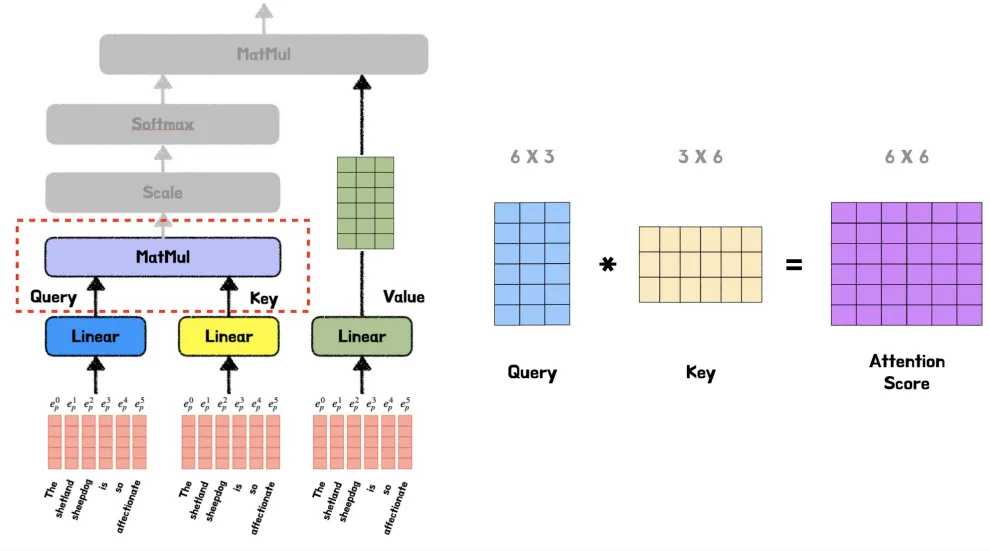

- 문제점
    - 벡터의 차원 dk가 커질수록 내적의 결과가 너무 커지거나 작아지는 문제 발생
    - Vanishing Gradient 발생

### (2) Scaled Dot-Product Attention

- Dot Product Attention 과정에서 내적을 진행한 후, 값의 크기를 맞추는 스케일링 과정 추가
- 기존 과정에서 계산된 값을 $\sqrt{d_K}$로 나누어 스케일링 진행
- 한 번의 나눗셈으로, 계산된 내적 값이 과도하게 증가하는 것을 방지해 안정적인 분포 형성\
=> Softmax 함수가 안정적으로 학습을 진행할 수 있도록 함

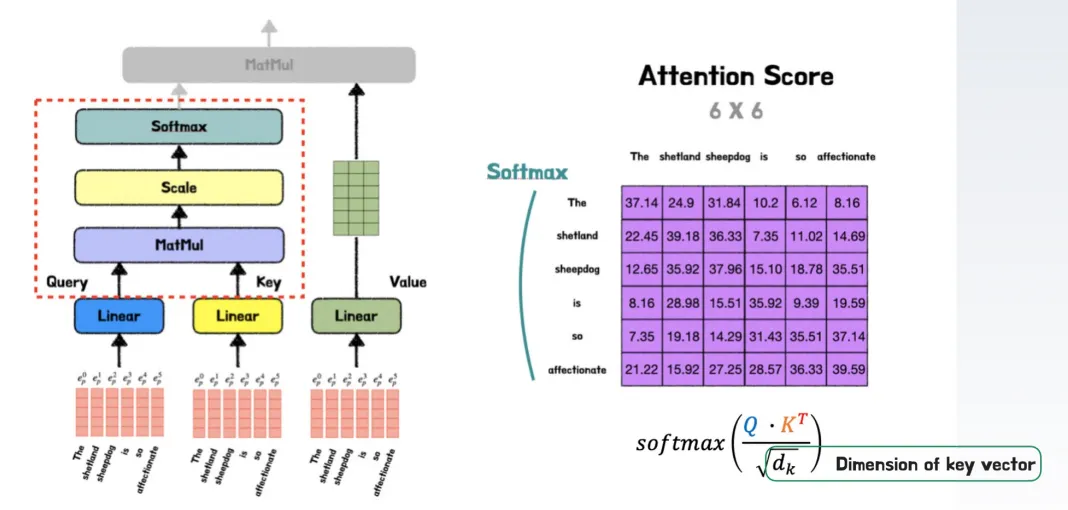

# 3. Multi-Head Attention

- Transformer 아키텍처에서 활용되는 부분
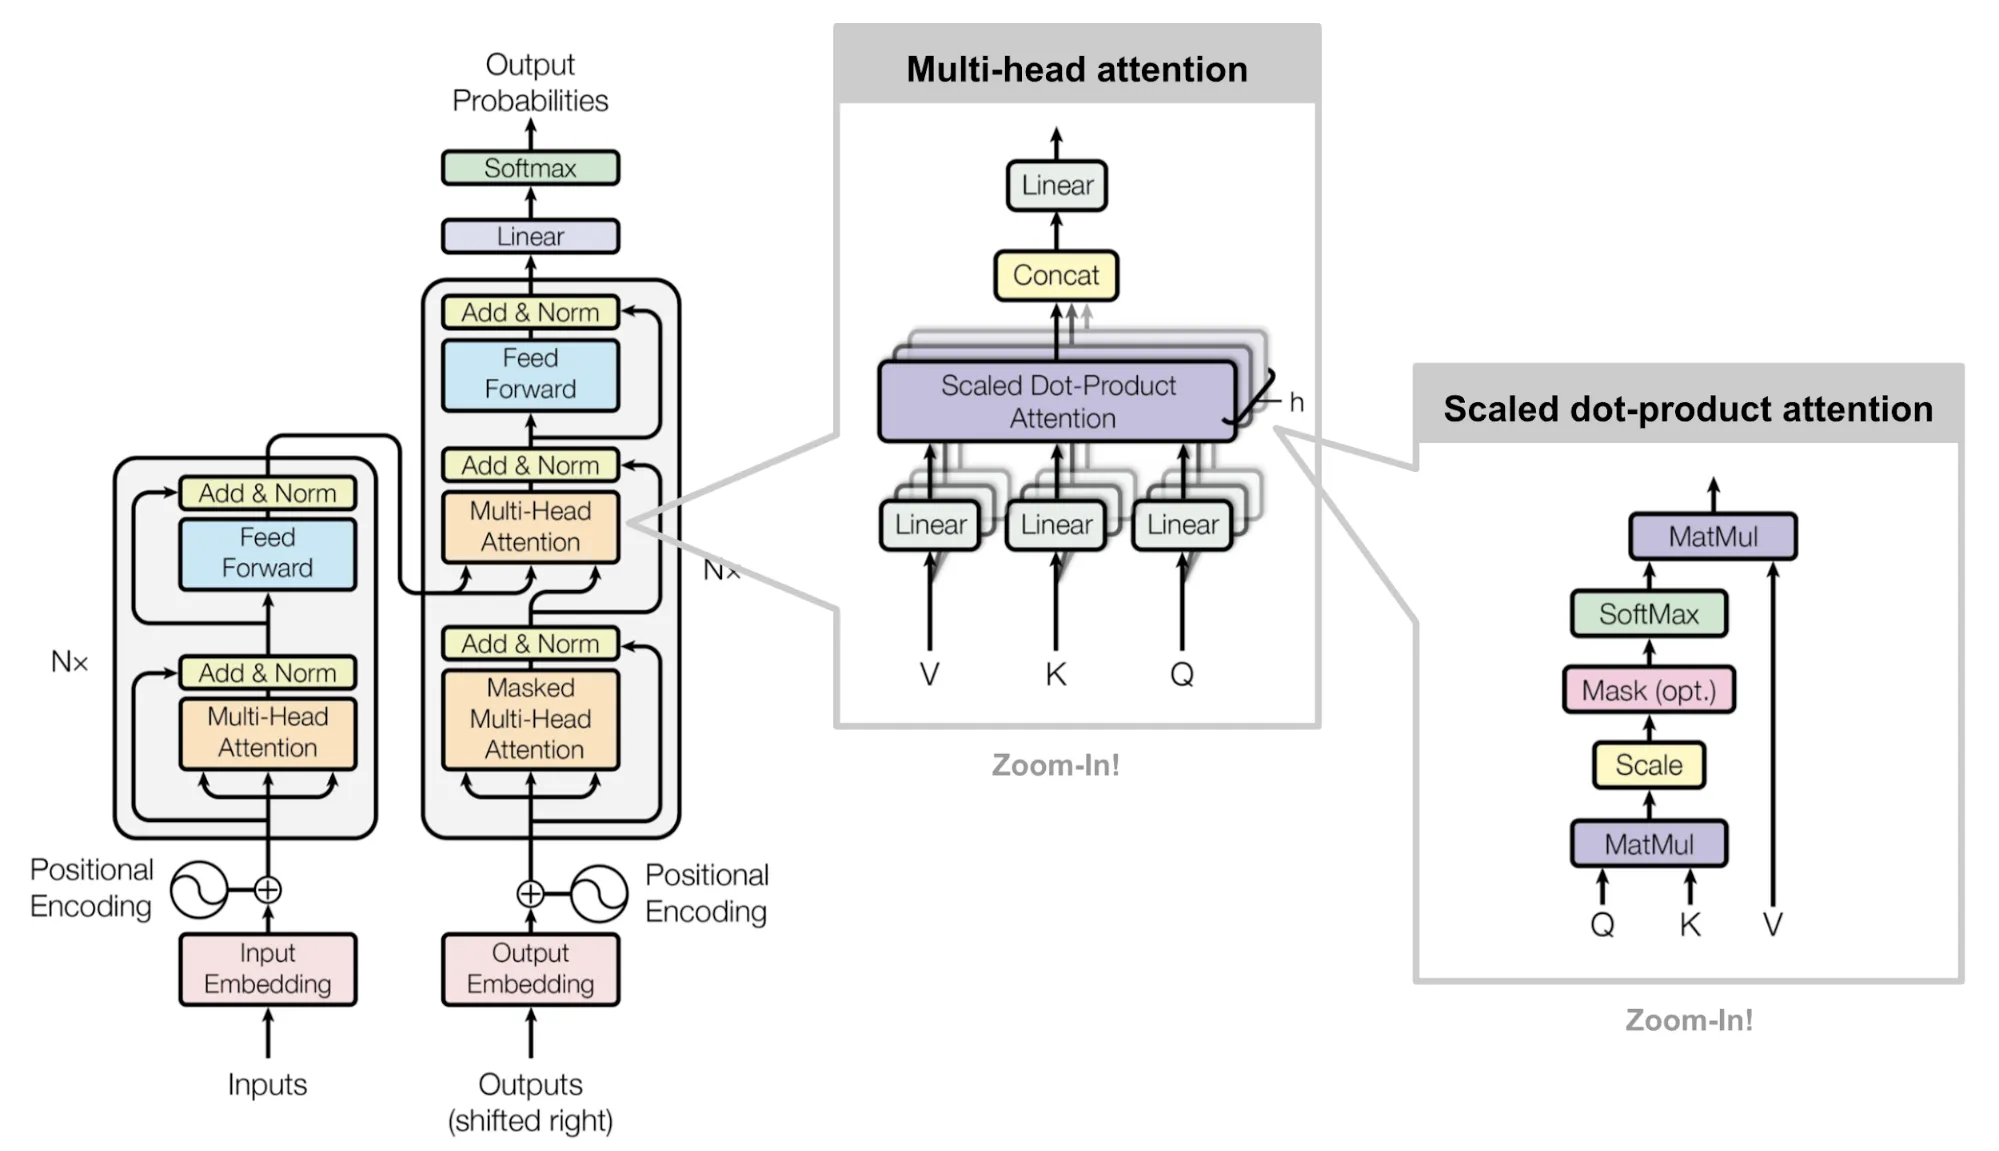

- 인코더에서 한 번, 디코더에서 두 번 일어남
- 인코딩된 토큰들을 아키텍처가 "이해할 때" 사용됨

## Why Multi-Head Attention?

- 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습
- Ex. 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고, Attention 스코어를 병렬로 여러번 계산


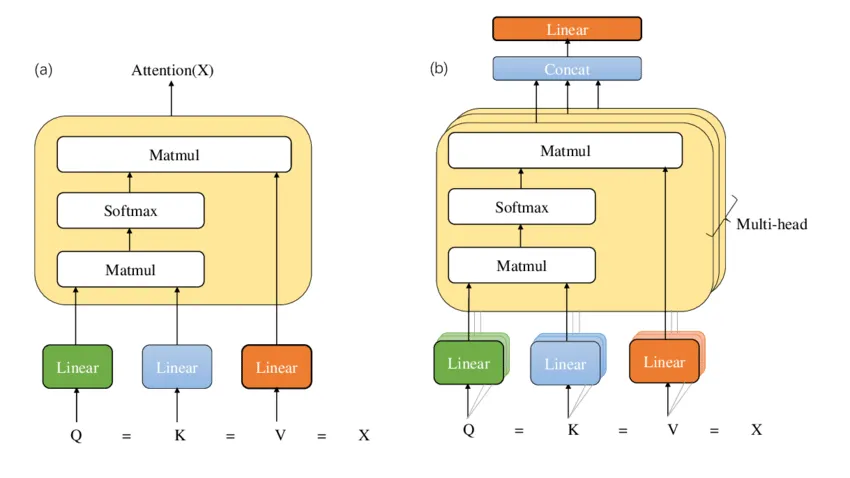

## Multi-Head Attention 작동 방식
- I love you라는 문장에서 'love'라는 단어의 벡터가 Multi-Head Attention Layer를 통과하는 과정을 예시로
- 각 단어의 차원 = 512
- 어텐션 헤드의 수 = 8
- 각 헤드의 차원 = 64

### (1) 분할 (Projection) - 8명의 헤드에 단어 벡터 할당
- 'love'라는 단어를 나타내는 하나의 512차원 벡터가 입력됨
- 이 벡터를 8개의 작은 벡터 그룹(Q,K,V)으로 투영해 8개의 서로 다른 관점으로 나눔

### (2) 병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행
- 8개의 헤드는 서로에게 전혀 간섭하지 않고, 병렬로 Scaled Dot-Product Attention 계산
- 하나의 헤드에서 일어나는 일
    1. 점수 계산 (Score)
    2. 크기 조절 (Scale)
    3. 가중치 변환 (Softmax)
    4. 가중합 (Weighted Sum)\
=> 8개 헤드에서 반복

### (3) 결합 및 최종 투영 - 전문가들의 분석 결과 취합
1. 결합 (Concatenate)
- 8개의 64차원 결과 벡터들을 순서대로 이어 붙여 하나의 거대한 512차원 백터를 만듦
2. 최종 투영 (Final Projection)
- 위 결합된 정보들을 잘 융합하고 최종적으로 정리하기 위해, 또 다른 가중치 행렬을 곱해줌

# 4. Transformer 전체 아키텍처

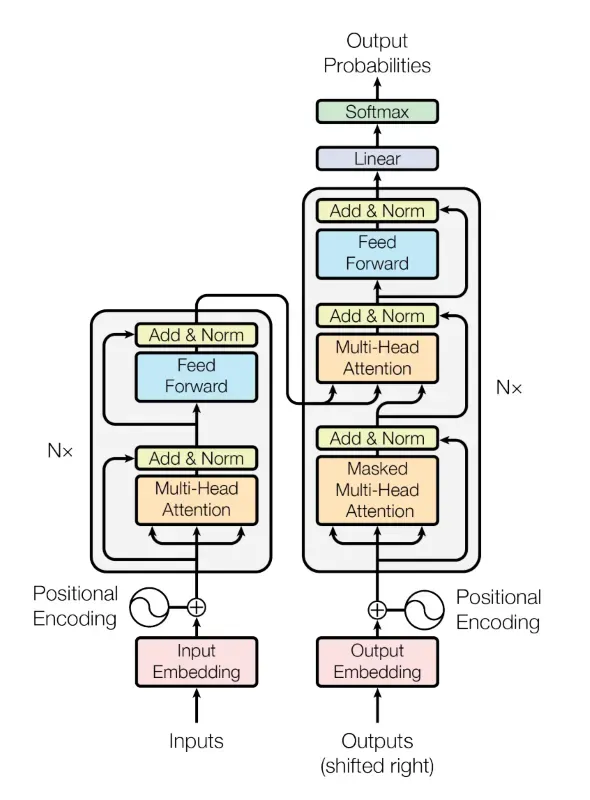

## 트랜스포머의 전처리 단계

### (1) 토큰화 (Tokenization)
- 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 첫 번째 단계

- 토큰화 방법
    1. 대부분 한 단어 = 한 토큰
    2. 문장 부호도 하나의 토큰
    3. 일부 단어는 하나 이상의 토큰으로 나눠짐 (ex. doesn't => does / n't)

### (2) 임베딩 (Embedding)
- 토큰화된 각 단위(토큰)는 임베딩 단계에서 숫자 벡터로 변환
- 많은 숫자로 이루어진 긴 벡터로 단어를 나타냄 (벡터의 길이 = 벡터의 차원)
- **단어의 의미를 공간적으로 표현하는 것**
- 임베딩은 단어의 문맥을 포착하고 단어 간 관계를 파악하는 어텐션메커니즘이 작동하기 전에 단어에 대한 기본적인 속성 제공

### (3) Positional Encoding
- 단어들의 순서 정보를 임베딩 벡터에 추가하는 단계
- 필요한 이유
    - Transformer는 모든 단어를 병렬로 한 번에 처리하기 때문에, 단어의 순서를 알지 못함
    - 하지만 단어들은 문법/문맥 측면에서 등장한 순서가 매우 중요함 (순서,위치 정보 필요)
- 동작 방식
    - 각 단어 임베딩 좌표에 일관된 순서(consistent sequence)를 따르는 다른 숫자를 추가해 순서 정보 기록\
    -> 문장에서 차지하는 위치가 다르면 최종적으로 다른 좌표를 가지게 됨 (모델이 순서를 학습)


## 트랜스포머의 Encoder와 Decoder

### (1) Encoder
- 입력 문장을 이해하고 요약된 의미의 벡터로 변환하는 역할
- 전처리 과정(토큰화, 임베딩, Positional Encoding) 및 인코더 레이어(Multi-Head Attetion, Feed Forward Layer)로 구성


| 구분 | RNN/LSTM | Transformer |
| --- | --- | --- |
| 처리 방식 | 단어를 **순서대로(Sequential)** 입력 | 단어를 **한 번에(Parallel)** 입력 |
| 정보 전달 | 이전 시점의 은닉상태 hₜ₋₁가 다음 시점으로 전달됨 | **Self-Attention**으로 모든 단어가 서로의 관계를 동시에 계산 |
| 순서 인식 | 시점(t) 자체에 순서가 내재되어 있음 | 순서가 없기 때문에 **Positional Encoding** 으로 보완 |
| 구조 구성 | RNN / LSTM 셀 반복 | Multi-Head Attention + Feed Forward층 반복 |
| Context Vector | 마지막 단어의 은닉 상태 하나 (hₙ) | 모든 단어의 출력 벡터 전체 (각 단어별 Context Representation) |

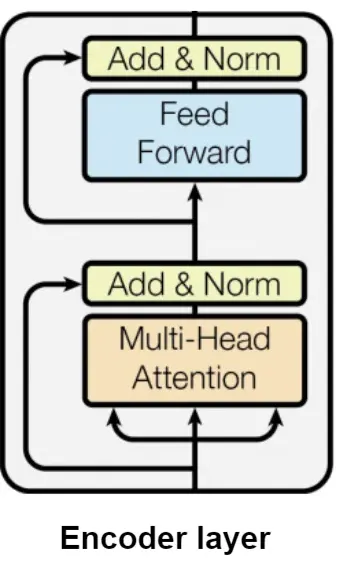

#### Feed Forward? 
- 입력 벡터의 차원을 확장하고 비선형 변환 (ex. ReLU)을 적용해 새로운 표현을 생성하는 신경망 구조
- MLP가 2층으로 완전 연결된 구조
- Attention에서 어떤 단어를 집중해서 볼지 확인 -> Feed Forward에서 그 단어에 대해 심층 분석

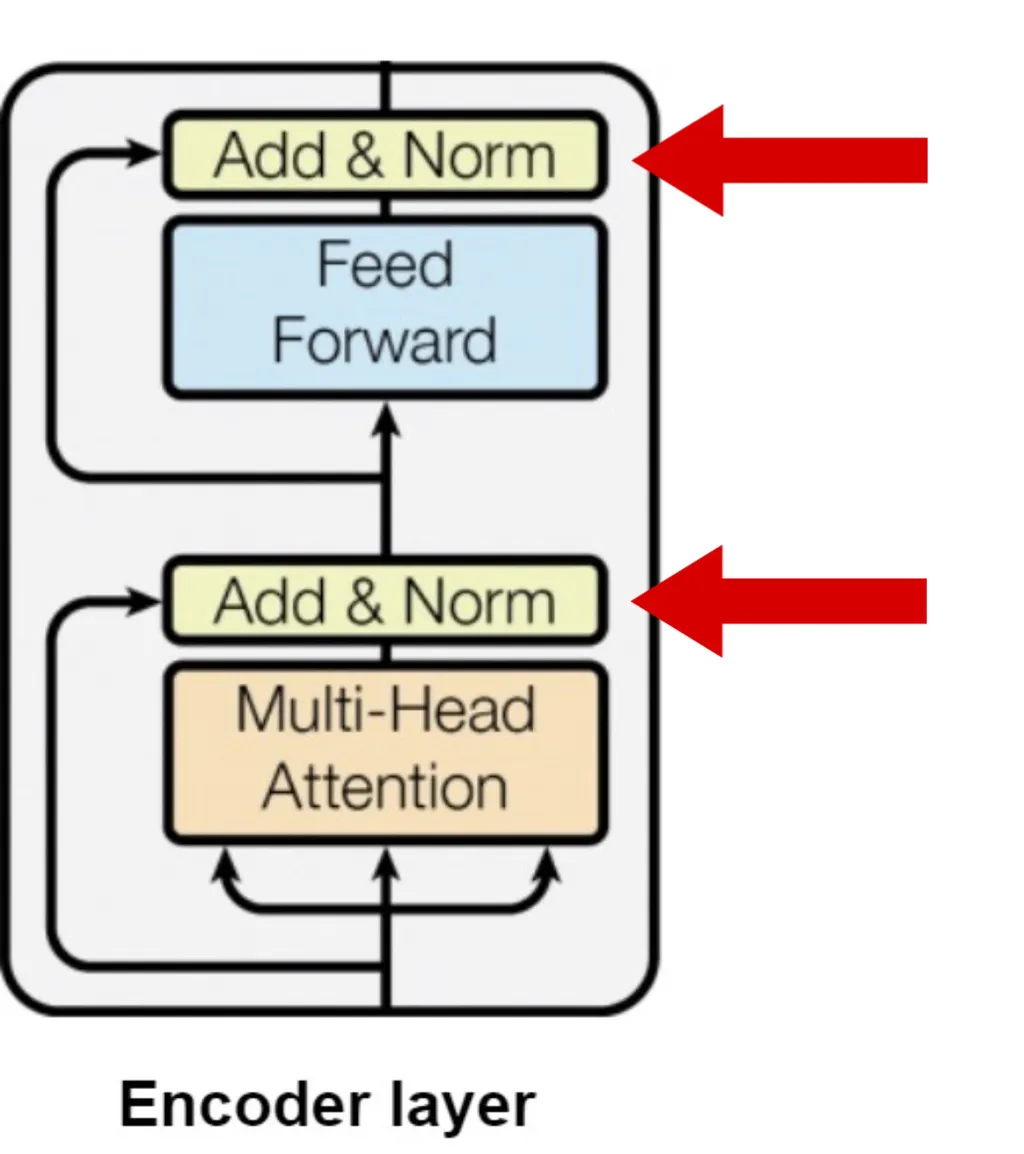

#### Add & Norm ?
- Residual Connections (잔차 연결)
    - 입력 값을 그대로 출력에 더해 주는 것
    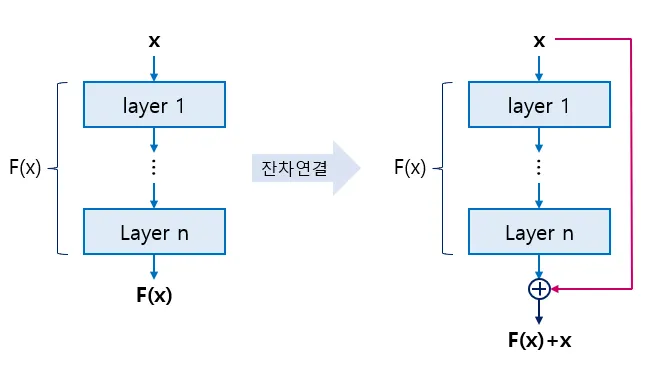
    - 오른쪽 그림처럼 출력에 입력값을 바로 전달해서, 기울기 소실 및 폭주 현상 방지
    - CNN 모델 중 ResNet 모델에서 나온 방법
- Layer Normalization (층 정규화)
    - 입력 벡터의 평균과 분산을 사용해 정규화
    - 학습을 안정화하고 모델이 빠르게 수렴하게 만들어 줌
    - 데이터의 스케일을 동일하게 만들어 각 피처의 중요도를 동등하게 만들어 주는 역할

### (2) Decoder
- Encoder가 분석한 입력 문장의 의미 벡터를 받아 출력 문장을 순차적으로 생성하는 역할
- 전처리 과정, 디코더 레이어, 선형 레이어, 소프트맥스 레이어로 구성

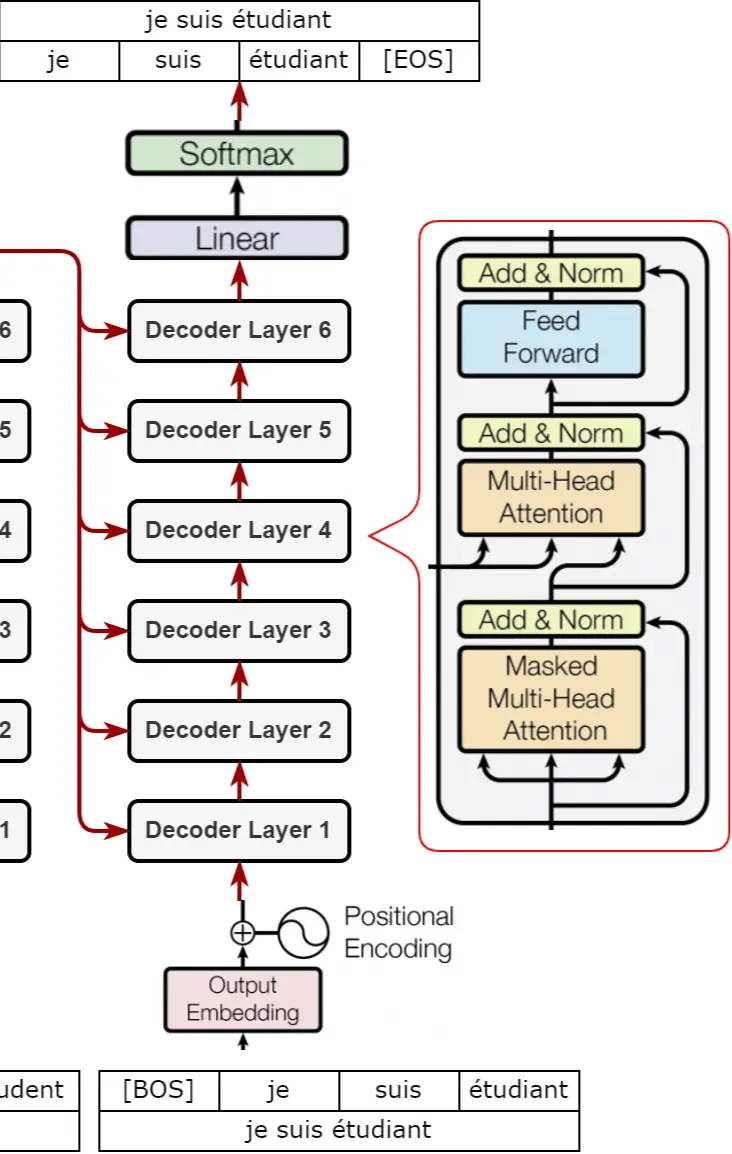

#### Encoder vs Decoder 특징
|     정보 흐름     |       양방향: 입력 시퀀스 전체를 한 번에 보고 문맥 파악       |         단방향: 특정 시점의 예측은 과거 토큰에만 의존         |
|:-----------------:|:-------------------------------------------------------------:|:-------------------------------------------------------------:|
| 병렬 처리         | 셀프 어텐션 후 FFN 단계에서 병렬 처리가 가능 → 처리 속도 빠름 | 학습 시에는 병렬 처리이지만, 출력 생성에서 순차적 → 속도 느림 |
| 입력 및 출력 차원 | 입출력 벡터의 차원은 동일하게 유지됨                          | 입출력 벡터의 차원은 동일하게 유지됨                          |
| 순서 인식         | 시점(t) 자체에 순서가 내재되어 있음                           | 순서가 없기 때문에 Positional Encoding 으로 보완              |
| 구조 구성         | RNN / LSTM 셀 반복                                            | Multi-Head Attention + Feed Forward층 반복                    |
| Context Vector    | 마지막 단어의 은닉 상태 하나 (hₙ)                             | 모든 단어의 출력 벡터 전체 (각 단어별 Context Representation) |
| 병렬 처리         | 불가능 (순차적)                                               | 가능                                                          |

#### 디코더 레이어 구성
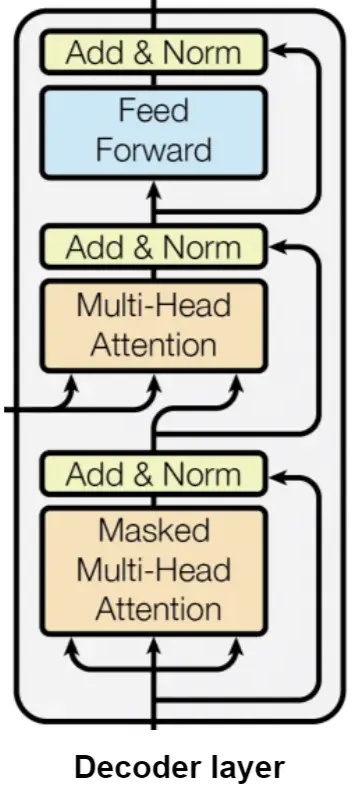
1. Masked Multi-Head Attention
2. Encoder-Decoder Multi-Head Attention (Cross-Attention)
3. Feed Forward Layer

#### Masked Multi-Head Attention?
- 미래 시점의 단어 정보를 참고하지 못하게 마스크를 적용하는 어텐션 메커니즘
- 시퀀스를 왼쪽에서 오른쪽으로 생성하며, 모델이 이미 생성된 단어들(과거 정보)만을 기반으로 다음 단어를 예측하도록 강제
- Look-Ahead Mask (Causal Mask)를 사용해 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시시킴